In [1]:
using Plots

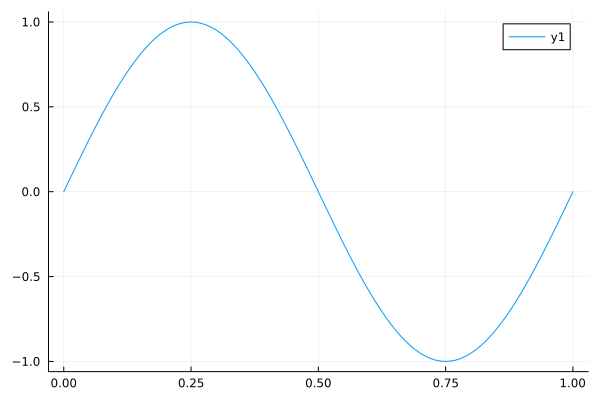

In [6]:
t = 0:0.01:1
x = sin.(2pi * t)

plt = plot(t, x)

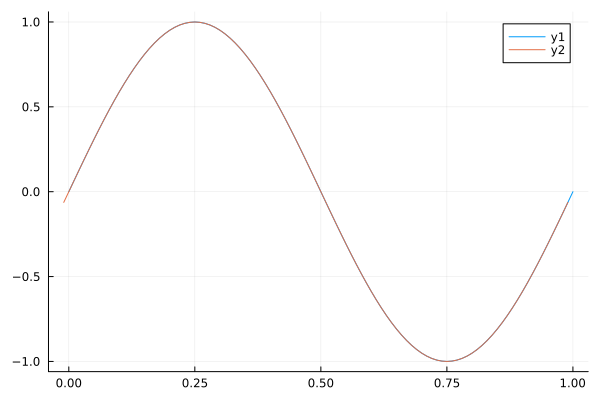

In [7]:
t_delay = -0.01:0.01:0.99
x_delay = sin.(2pi * (t_delay))

plot!(plt, t_delay, x_delay)

In [8]:
println(length(x))
println(length(x_delay))

101
101


In [9]:
delay_coords = hcat([x x_delay])

101×2 Matrix{Float64}:
  0.0          -0.0627905
  0.0627905     0.0
  0.125333      0.0627905
  0.187381      0.125333
  0.24869       0.187381
  0.309017      0.24869
  0.368125      0.309017
  0.425779      0.368125
  0.481754      0.425779
  0.535827      0.481754
  ⋮            
 -0.481754     -0.535827
 -0.425779     -0.481754
 -0.368125     -0.425779
 -0.309017     -0.368125
 -0.24869      -0.309017
 -0.187381     -0.24869
 -0.125333     -0.187381
 -0.0627905    -0.125333
 -2.44929e-16  -0.0627905

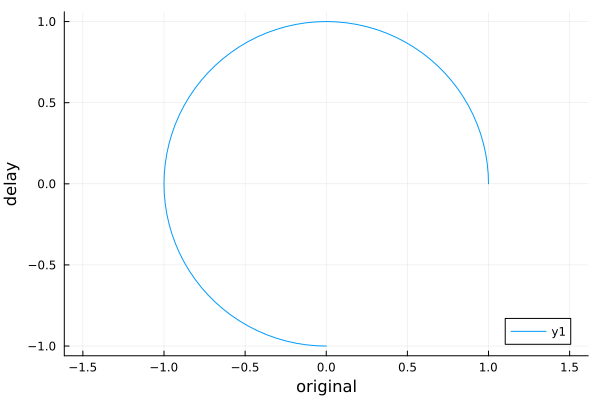

In [10]:
delay = 25
x_delay = x[1:end-delay]
x_original = x[delay+1:end]

plt = plot(x_original, x_delay, xlabel="original", ylabel="delay", aspect_ratio=:equal)

In [11]:
function henon_map(x::Vector{Float64})
    y = similar(x)
    a = 1.4
    b = 0.3
    y[1] = 1 - a * x[1]^2 + x[2]
    y[2] = b * x[1]
    return y
end

x_0 = [0.1, 0.1]
N = 1000

trajectory = zeros(2, N + 1)
trajectory[:, 1] = x_0
for i in 1:N
    trajectory[:, i+1] = henon_map(trajectory[:, i])
end

In [12]:
trajectory

2×1001 Matrix{Float64}:
 0.1  1.086  -0.621154   0.785634  …   0.988747  -0.51413    0.926563
 0.1  0.03    0.3258    -0.186346     -0.145462   0.296624  -0.154239

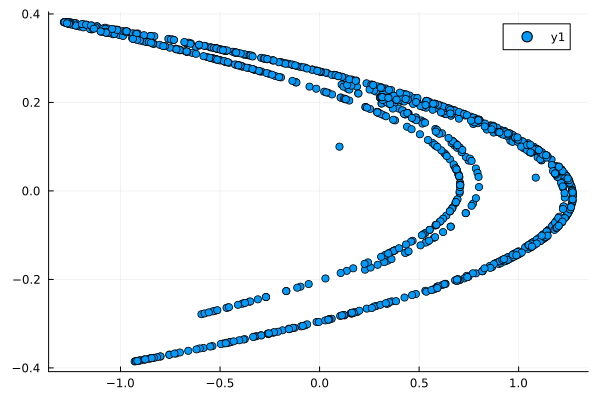

In [13]:
scatter(trajectory[1, :], trajectory[2, :])

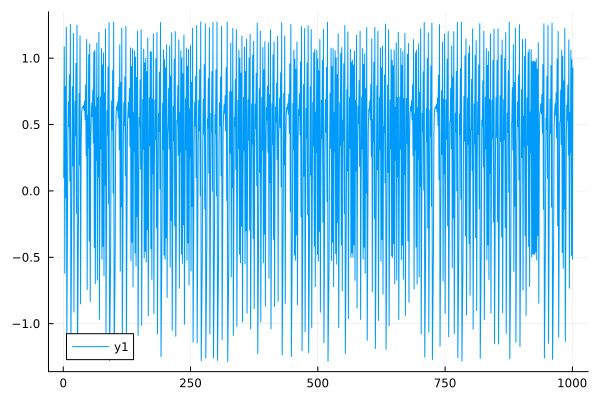

In [14]:
plot(trajectory[1, :])

In [15]:
function make_delay_coordinate(x::Vector{Float64}, delay::Int, num::Int)
    delay_coords = zeros(length(x) - delay * (num - 1), num)
    for i in 1:num
        delay_coords[:, i] = x[(i-1)*delay+1:end-(num-i)*delay]
    end
    return delay_coords
end

make_delay_coordinate (generic function with 1 method)

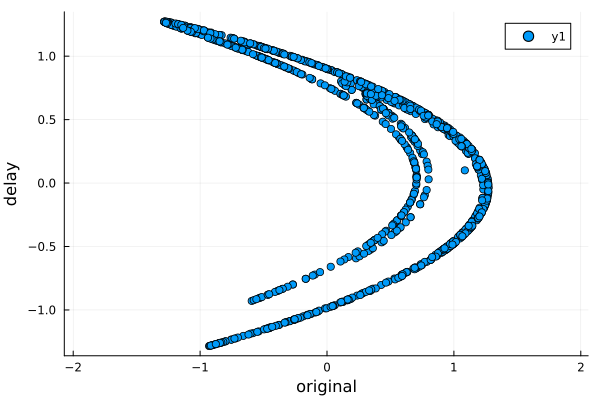

In [16]:
delay = 1
x_delay = trajectory[1, 1:end-delay]
x_original = trajectory[1, delay+1:end]

plt = scatter(x_original, x_delay, xlabel="original", ylabel="delay", aspect_ratio=:equal)